# Forex analysis

Importing libraries for statistical analysis and plotting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  1. Getting data

In [4]:
eurusd = pd.read_csv("data/EURUSD_daily.csv", index_col='Date')

In [5]:
eurusd.index = pd.to_datetime(eurusd.index)

In [6]:
eurusd.head()

,EUR/USD Close
Date,
2000-01-03,1.0276
2000-01-04,1.0299
2000-01-05,1.0317
2000-01-06,1.0299
2000-01-07,1.0283


In [7]:
eurusd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EUR/USD Close,4636.0,1.216572,0.174817,0.8276,1.100698,1.253,1.3426,1.5997


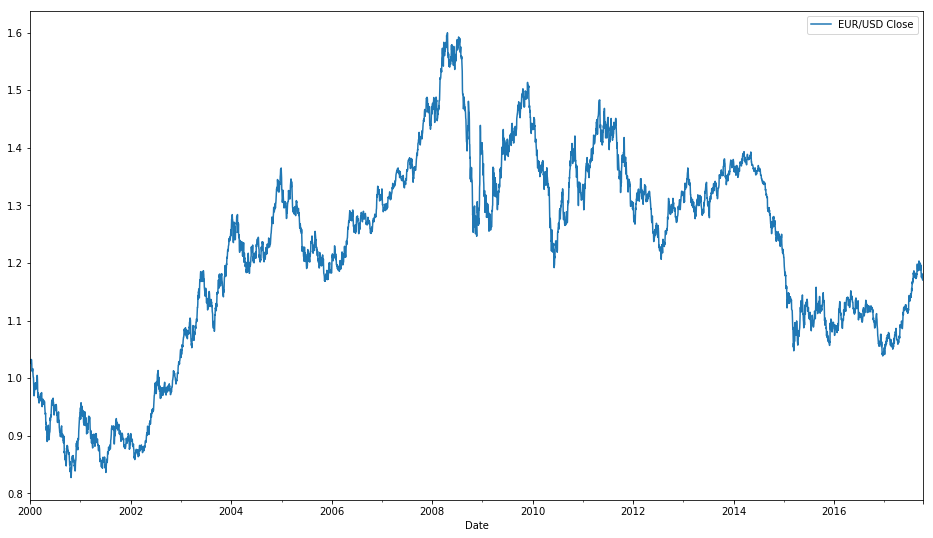

In [8]:
eurusd.plot(figsize=(16,9))

In [9]:
timeseries = eurusd['EUR/USD Close']

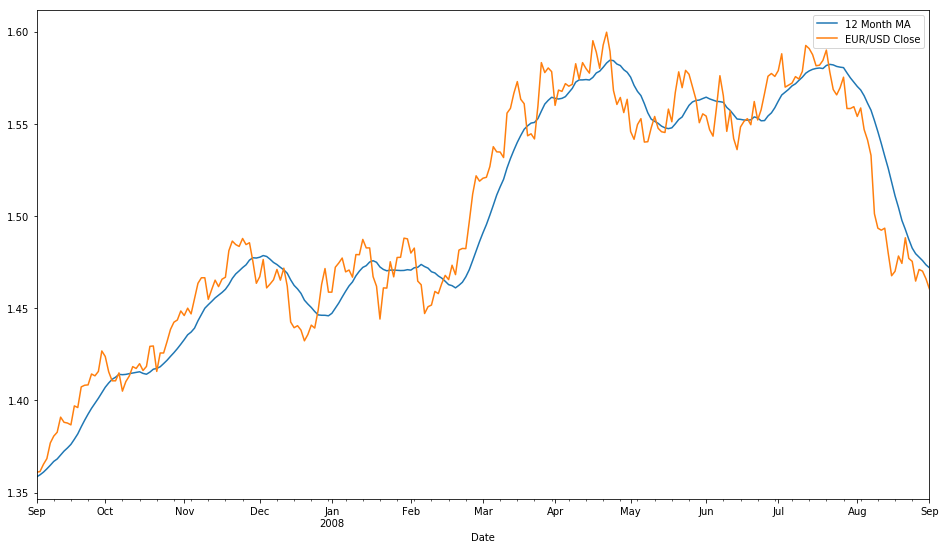

In [10]:
timeseries.rolling(12).mean()['2007-09-01':'2008-09-01'].plot(label='12 Month MA', figsize = (16,9))
#timeseries.rolling(12).std()['2007-09-01':'2008-09-01'].plot(label='12 Month rolling STD')
timeseries['2007-09-01':'2008-09-01'].plot()
plt.legend(loc='best')

# Testing for Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

/home/dawe/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
result = adfuller(timeseries)

In [16]:
def adf_test(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

In [17]:
adf_test(timeseries)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.66953988422
p-value : 0.446870801803
#Lags Used : 0
Number of Observations Used : 4635
Data is non-stationary 


In [15]:
eurusd['Fx rate first difference'] = eurusd['EUR/USD Close'] - eurusd['EUR/USD Close'].shift(1)

In [18]:
adf_test(eurusd['Fx rate first difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -68.1499749949
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 4634
Data is stationary


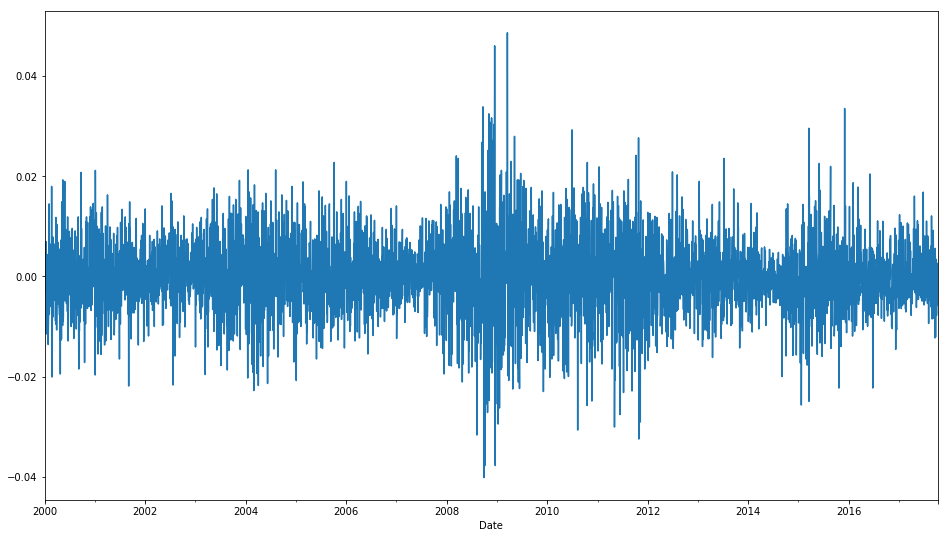

In [20]:
eurusd['Fx rate first difference'].plot(figsize = (16,9))

# ARIMA model